# A2 - Ciência de Redes
### Ana Júlia Amaro Pereira Rocha
### Maria Eduarda Mesquita Magalhães

1) Gere uma rede aleatória (ER) com 10.000 vértices e grau médio ⟨𝑘⟩ = 20. Comece com 5 vértices infectados escolhidos aleatoriamente.  
Execute múltiplas simulações da propagação da infecção pelo modelo **SIS** com os parâmetros abaixo e compare com os resultados esperados.  

> *Sugestão:* faça em torno de 100 simulações e descreva o comportamento da epidemia “na média”. 

a. 𝛽 = 0.02 e 𝜇 = 0.1  
b. 𝛽 = 0.02 e 𝜇 = 0.4  
c. 𝛽 = 0.02 e 𝜇 = 0.5  

Mostre que, se 𝑅₀ = (𝛽⟨𝑘⟩) / 𝜇 > 1, então a doença se fixa na rede no modelo **SIS** de campo médio.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parâmetros globais da simulação
N = 10_000             # número de vértices
k_medio = 20           
p = k_medio / (N - 1)  # probabilidade de conexão na rede ER
num_simulacoes = 100   
passos = 100           

# Parâmetros epidemiológicos a testar
parametros = [
    (0.02, 0.1),  
    (0.02, 0.4),
    (0.02, 0.5)
]

In [2]:
# Função para simular o modelo SIS
def simular_SIS(G, beta, mu, passos, infectados_iniciais=5):
    """
    Simula a propagação SIS em uma rede G.
    Retorna a fração de infectados ao longo do tempo.
    """
    estados = np.zeros(G.number_of_nodes(), dtype=int)  # 0 = suscetível, 1 = infectado
    infectados = np.random.choice(G.nodes(), infectados_iniciais, replace=False)
    estados[infectados] = 1

    fracao_infectados = []

    for _ in range(passos):
        novos_estados = estados.copy()
        for i in G.nodes():
            if estados[i] == 1:
                # Recuperação com probabilidade mu
                if np.random.rand() < mu:
                    novos_estados[i] = 0
            else:
                # Infecção com probabilidade dependente dos vizinhos infectados
                vizinhos_infectados = sum(estados[j] for j in G.neighbors(i))
                prob_infeccao = 1 - (1 - beta) ** vizinhos_infectados
                if np.random.rand() < prob_infeccao:
                    novos_estados[i] = 1

        estados = novos_estados
        fracao_infectados.append(np.mean(estados))

    return fracao_infectados

Gerando rede aleatória ER...
Simulando β=0.02, μ=0.1 ...


100%|██████████| 100/100 [06:30<00:00,  3.90s/it]


Simulando β=0.02, μ=0.4 ...


100%|██████████| 100/100 [12:02<00:00,  7.23s/it]


Simulando β=0.02, μ=0.5 ...


100%|██████████| 100/100 [12:13<00:00,  7.33s/it]


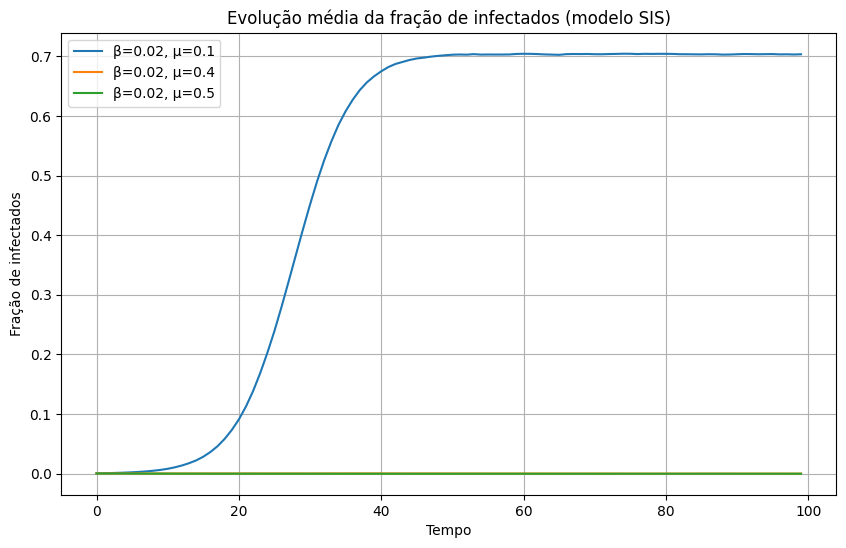

In [3]:
# Criação da rede ER
print("Gerando rede aleatória ER...")
G = nx.erdos_renyi_graph(N, p)

# Simulações para cada conjunto de parâmetros
resultados_medios = {}

for beta, mu in parametros:
    print(f"Simulando β={beta}, μ={mu} ...")
    todas_simulacoes = []

    for _ in tqdm(range(num_simulacoes)):
        fracao = simular_SIS(G, beta, mu, passos)
        todas_simulacoes.append(fracao)

    media = np.mean(todas_simulacoes, axis=0)
    resultados_medios[(beta, mu)] = media

# Visualização dos resultados
plt.figure(figsize=(10, 6))
for (beta, mu), serie in resultados_medios.items():
    plt.plot(serie, label=f"β={beta}, μ={mu}")

plt.title("Evolução média da fração de infectados (modelo SIS)")
plt.xlabel("Tempo")
plt.ylabel("Fração de infectados")
plt.legend()
plt.grid(True)
plt.show()

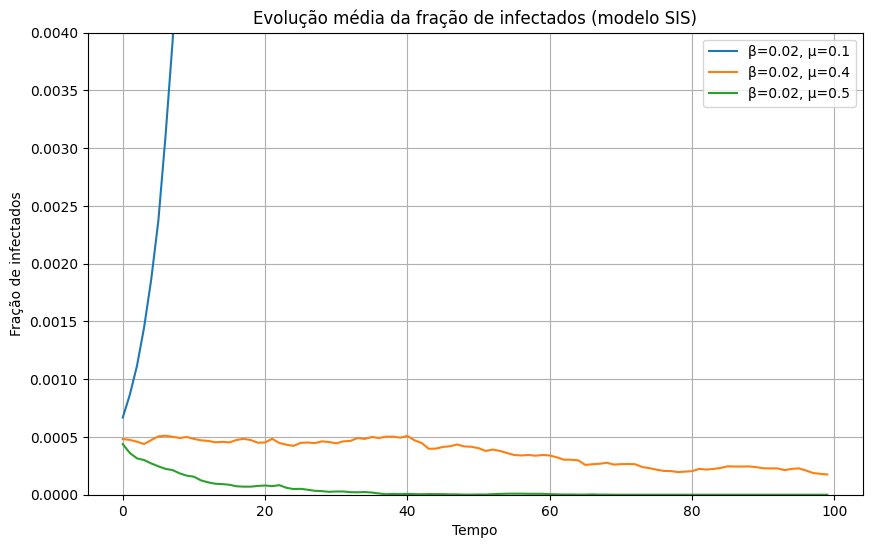

In [20]:
# Mudando a escala para enxergar a linha laranja
plt.figure(figsize=(10, 6))
for (beta, mu), serie in resultados_medios.items():
    plt.plot(serie, label=f"β={beta}, μ={mu}")

plt.title("Evolução média da fração de infectados (modelo SIS)")
plt.xlabel("Tempo")
plt.ylabel("Fração de infectados")
plt.legend()
plt.grid(True)
plt.ylim(0, 0.004)
plt.show()

Este gráfico mostra a **evolução temporal da fração média de vértices infectados**,
calculada a partir de 100 simulações independentes para cada conjunto de parâmetros.

- **β = 0.02, μ = 0.1 (R₀ = 4.0):** a fração de infectados cresce e se estabiliza em um valor alto — a infecção **se fixa na rede**, atingindo um estado endêmico.
- **β = 0.02, μ = 0.4 (R₀ = 1.0):** a fração se mantém próxima de zero ou flutua, indicando o **limiar epidêmico**.
- **β = 0.02, μ = 0.5 (R₀ = 0.8):** a fração decai rapidamente para zero — a infecção **se extingue**.

> Este gráfico confirma visualmente a transição de fase prevista pelo modelo de campo médio:
> quando \( R_0 > 1 \), a doença persiste; quando \( R_0 < 1 \), desaparece.

In [13]:
# Cálculo de R₀ e interpretação
for beta, mu in parametros:
    R0 = (beta * k_medio) / mu
    print(f"Para β={beta}, μ={mu} → R₀ = {R0:.2f}")
    if R0 > 1:
        print("A infecção persiste (estado endêmico).")
    elif R0 == 1:
        print("Limiar epidêmico: comportamento crítico, pode persistir ou desaparecer.")
    else:
        print("A infecção desaparece (sem epidemia).")

Para β=0.02, μ=0.1 → R₀ = 4.00
A infecção persiste (estado endêmico).
Para β=0.02, μ=0.4 → R₀ = 1.00
Limiar epidêmico: comportamento crítico, pode persistir ou desaparecer.
Para β=0.02, μ=0.5 → R₀ = 0.80
A infecção desaparece (sem epidemia).


In [ ]:
# Histograma da fração final de infectados
plt.figure(figsize=(10, 5))
for beta, mu in parametros:
    R0 = (beta * k_medio) / mu
    finais = []
    for _ in range(num_simulacoes):
        fracao = simular_SIS(G, beta, mu, passos)
        finais.append(fracao[-1])
    plt.hist(finais, bins=30, alpha=0.5, label=f"β={beta}, μ={mu} (R₀={R0:.1f})")

plt.title("Distribuição da fração final de infectados")
plt.xlabel("Fração final de infectados")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True)
plt.show()

Neste gráfico, cada simulação fornece a **fração final de infectados** após o último passo temporal. As 100 simulações são reunidas em um **histograma** para cada valor de μ.

- Para **R₀ > 1**, a maioria das simulações termina com **alta fração de infectados**.  
- Para **R₀ ≈ 1**, o histograma se torna **bimodal** — algumas simulações extinguem a infecção,
  enquanto outras permanecem endêmicas.
- Para **R₀ < 1**, as simulações terminam com **fração zero**, indicando extinção da epidemia.

> Este gráfico destaca o caráter **estocástico** do modelo:
> mesmo com parâmetros fixos, a variabilidade entre execuções é significativa perto do limiar.

## Síntese

A análise dos gráficos mostra uma coerência clara entre os resultados simulados e a teoria do modelo SIS de campo médio:

- Para \( R_0 > 1 \), a infecção **se mantém** na rede, com fração estacionária positiva.  
- Para \( R_0 < 1 \), a infecção **desaparece** rapidamente.  
- O ponto crítico \( R_0 = 1 \) marca a **transição epidêmica**.  

Esses resultados demonstram como a estrutura da rede e os parâmetros epidemiológicos
determinam o destino da doença — **persistência endêmica** ou **erradicação** —
no contexto de epidemias em redes complexas.